This section is heavily based on findings from the Book _"Practical Quantum Computing for Developers"_, which can be found here: https://www.researchgate.net/publication/329598188_Practical_Quantum_Computing_for_Developers_Programming_Quantum_Rigs_in_the_Cloud_using_Python_Quantum_Assembly_Language_and_IBM_QExperience

To experiment further with differing probabilities of qubits, we will now replicate the GHZ states tests.

# Greenberger-Horner-Zeilinger States Tests

The _GHZ_ States Tests is a generalized tests for _N_ entangled qubits, with the simplest one being _N=3_. The important bit beforehand:

> "_The importance of the GHZ states is that they show that the entanglement of more than two particles is in conflicht with local realism not only for statistical (probabilistic) but also nonstatistical (deterministic) predictions._"

[Practical Quantum Computing for Developers, page 95, Silva Vladimir, SN 978-1-4842-4217-9](https://www.researchgate.net/publication/329598188_Practical_Quantum_Computing_for_Developers_Programming_Quantum_Rigs_in_the_Cloud_using_Python_Quantum_Assembly_Language_and_IBM_QExperience)

In [31]:
#Lets start with the needed imports
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram


In [32]:
#let's add a helper functions
def execute_circuit_and_plot(circuit, runs=2000):
    simulator = QasmSimulator()
    compiled_circuit = transpile(circuit, simulator)
    job = simulator.run(compiled_circuit, shots=runs)
    result = job.result()
    counts = result.get_counts(circuit)
    plot_histogram(counts)

## GHZ in more detail

The GHZ test for 3 qubits is defined as follows

$$
\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}
$$

$$
\ket{GHZ} = \frac{1}{\sqrt(2)}(\ket{000}+\ket{111})
$$


As we can see, _GHZ_ is a superposition of $\ket{000}$ and $\ket{111}$ 

The idea behind it is relatively simple. Lets say we have 4 boxes, each containing a multiplication of _N_ variables that are global, equals either 1 or -1. 

```
1) XYY = 1
2) YXY = 1
3) YYX = 1
4) XXX = -1
```

Now we define that _Y_ equals 1. This leads us to the following:

```
1) X11 = 1
2) 1X1 = 1
3) 11X = 1
4) XXX = -1
5) Multiply 1 * 2 * 3 => XXX = 1
``` 

In the classical sense, there is no solution to this, as statement _4_ and _5_ directly contradict each other. But what if I told you, that _GHZ_ does indeed _provide a solution to this problem?_

Whilst impossible in the classical realm, it's only _improbable_ in the quantum realm!

## GHZ as a circuit

First, we need to _understand_ how the circuit needs to be constructed.



In [45]:
#let's define this as a function as we will need it multiple times
def generate_basic_ghz_circuit():
    circuit = QuantumCircuit(3,3)
    circuit.h(0)
    circuit.cx(0,1)
    circuit.cx(1,2)
    circuit.barrier()
    return circuit

Don't be afraid if the `circuit.barrier()` is new - it's not part of the standard quantum textbook, and is only a conceptual part of qiskit. It's to make sure that compilation optimizations don't interfere with your circuit design. This way, you can make sure that subsets of your circuit are handled _as is_ and not optimized away with later circuit contructions.

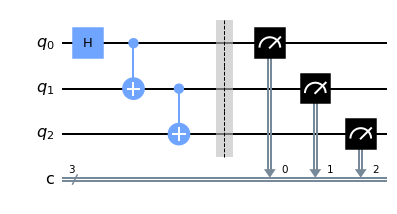

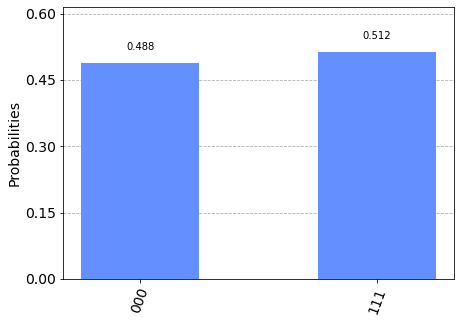

In [46]:
#lets try the function out!
circuit = generate_basic_ghz_circuit()
circuit.measure(range(3), range(3))
circuit.draw('mpl')
execute_circuit_and_plot(circuit=circuit)